In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path='C:\\Users\\abhin\\Downloads\\train_NIR5Yl1.csv'
up=pd.read_csv(file_path)
up

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [3]:
up.shape

(330045, 7)

In [4]:
up.size

2310315

In [5]:
up.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

In [6]:
up.values

array([[52664, 'a', 3942.0, ..., 155623, 7855.0, 42.0],
       [327662, 'a', 26046.0, ..., 21781, 55801.0, 1175.0],
       [468453, 'c', 1358.0, ..., 56177, 8067.0, 60.0],
       ...,
       [210756, 'c', 6178.0, ..., 91701, 2453.0, 15.0],
       [56089, 'j', 89.0, ..., 80245, 2107.0, 3.0],
       [300553, 'j', 2001.0, ..., 154692, 2554.0, 37.0]], dtype=object)

In [7]:
up.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [8]:
up.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [9]:
col=['ID','Tag']
up.drop(col,axis=1,inplace=True)

In [10]:
num=up.select_dtypes(include=['number']).columns
cat=up.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index([], dtype='object')
num: Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')


# Numerical Data analysis

In [11]:
for i in num:
    d_count=round(up[i].count(),2)
    d_max=round(up[i].max(),2)
    d_min=round(up[i].min(),2)
    d_mean=round(up[i].mean(),2)
    d_median=round(up[i].median(),2)
    d_std=round(up[i].std(),2)
    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

Reputation count: 330045
Reputation max: 1042428.0
Reputation min: 0.0
Reputation mean: 7773.15
Reputation median: 1236.0
Reputation std: 27061.41
------------------------------------
Answers count: 330045
Answers max: 76.0
Answers min: 0.0
Answers mean: 3.92
Answers median: 3.0
Answers std: 3.58
------------------------------------
Username count: 330045
Username max: 175738
Username min: 0
Username mean: 81442.89
Username median: 79010.0
Username std: 49215.1
------------------------------------
Views count: 330045
Views max: 5231058.0
Views min: 9.0
Views mean: 29645.07
Views median: 8954.0
Views std: 80956.46
------------------------------------
Upvotes count: 330045
Upvotes max: 615278.0
Upvotes min: 0.0
Upvotes mean: 337.51
Upvotes median: 28.0
Upvotes std: 3592.44
------------------------------------


In [12]:
for i in num:
    q1=np.quantile(up[i],0.25)
    q2=np.quantile(up[i],0.50)
    q3=np.quantile(up[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

Reputation q1: 282.0
Reputation q2: 1236.0
Reputation q3: 3
------------
Answers q1: 2.0
Answers q2: 3.0
Answers q3: 3
------------
Username q1: 39808.0
Username q2: 79010.0
Username q3: 3
------------
Views q1: 2594.0
Views q2: 8954.0
Views q3: 3
------------
Upvotes q1: 8.0
Upvotes q2: 28.0
Upvotes q3: 3
------------


In [13]:
up.describe()

,Reputation,Answers,Username,Views,Upvotes
count,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


# Histogram

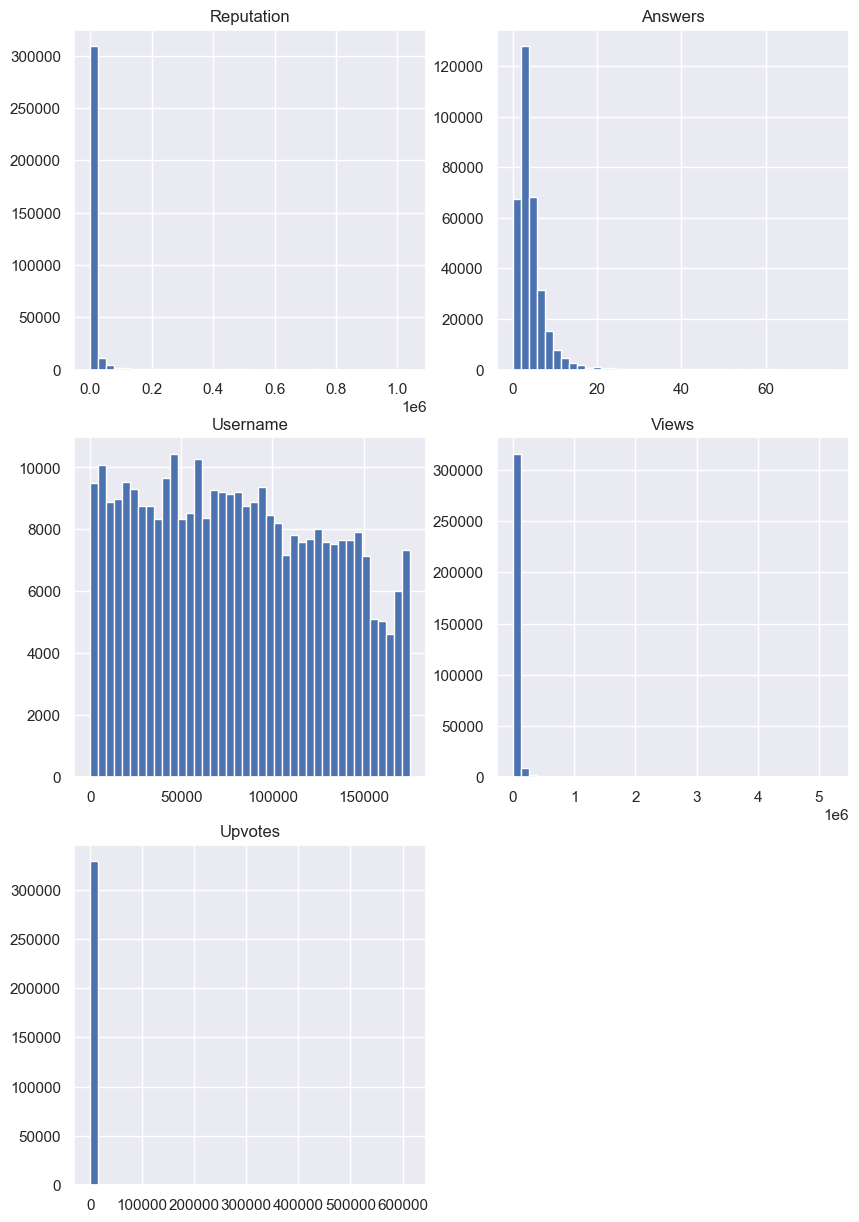

In [14]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.hist(up[column],bins=40)
plt.show()    

In [15]:
for i in (num):
    print(i,up[i].skew())

Reputation 11.23002745918498
Answers 3.380168663661785
Username 0.142087623802726
Views 14.37070387509174
Upvotes 74.24968921492014


In [16]:
num

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

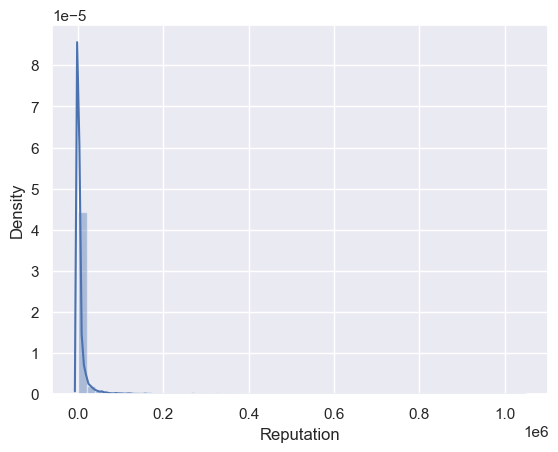

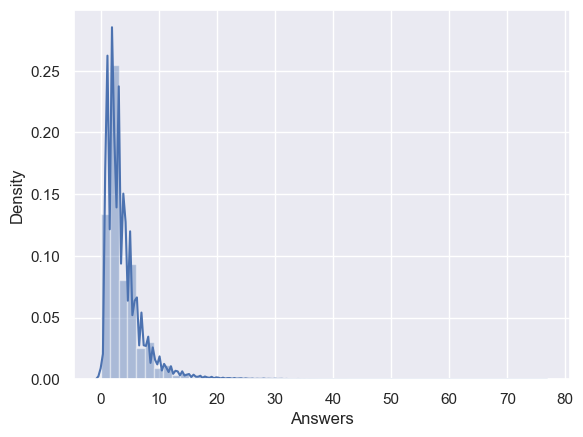

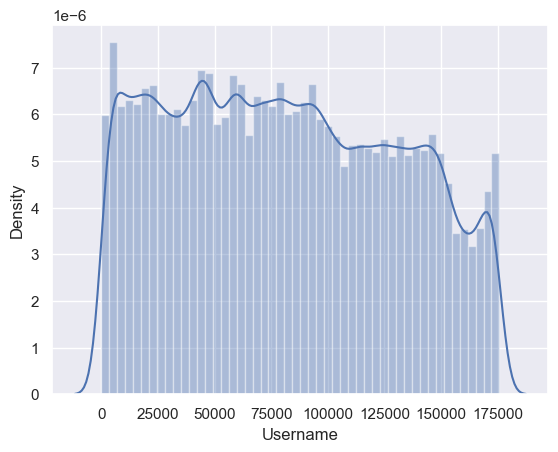

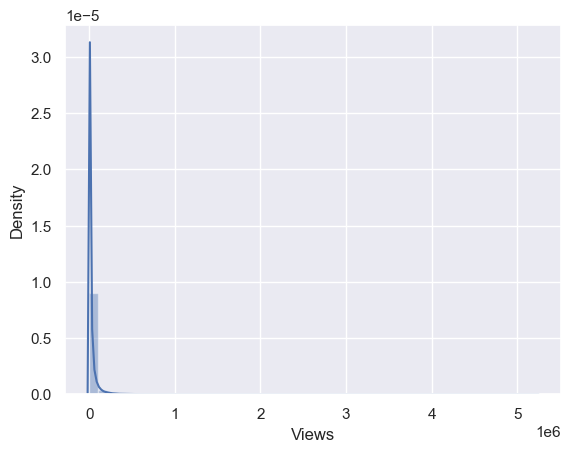

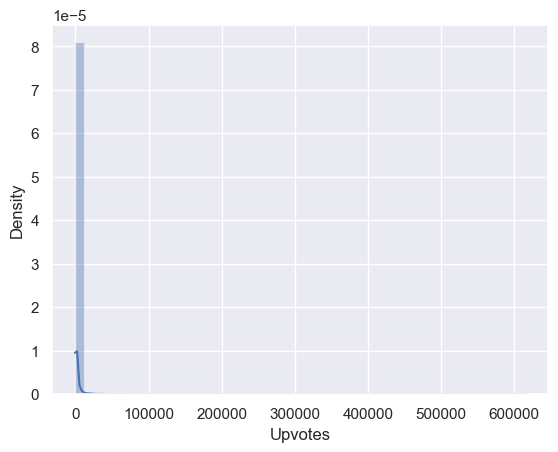

In [17]:
for i in num:
    sns.distplot(up[i])
    plt.show()

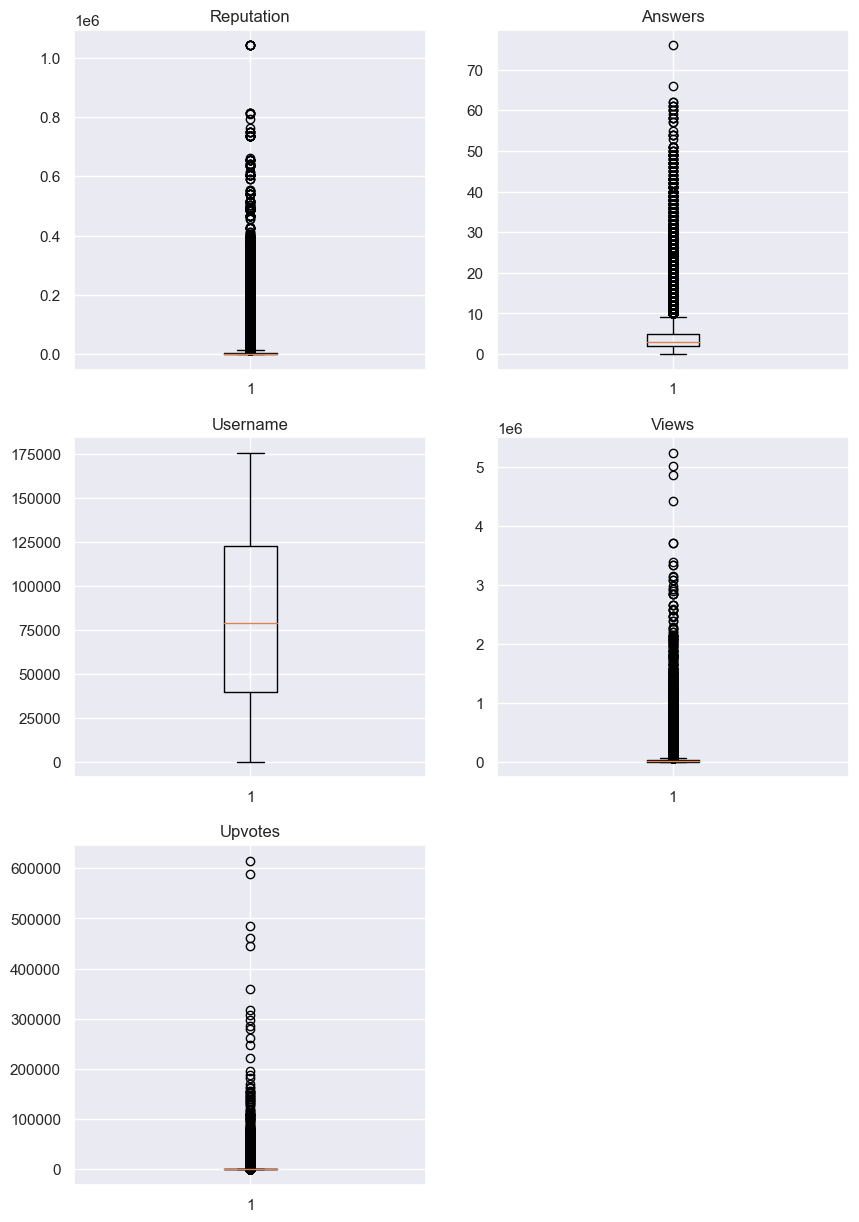

In [18]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(up[column])
plt.show()

In [19]:
num

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

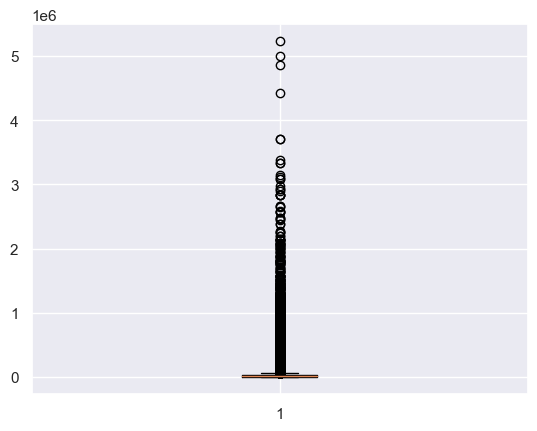

In [20]:
plt.boxplot(up['Views'])
plt.show()

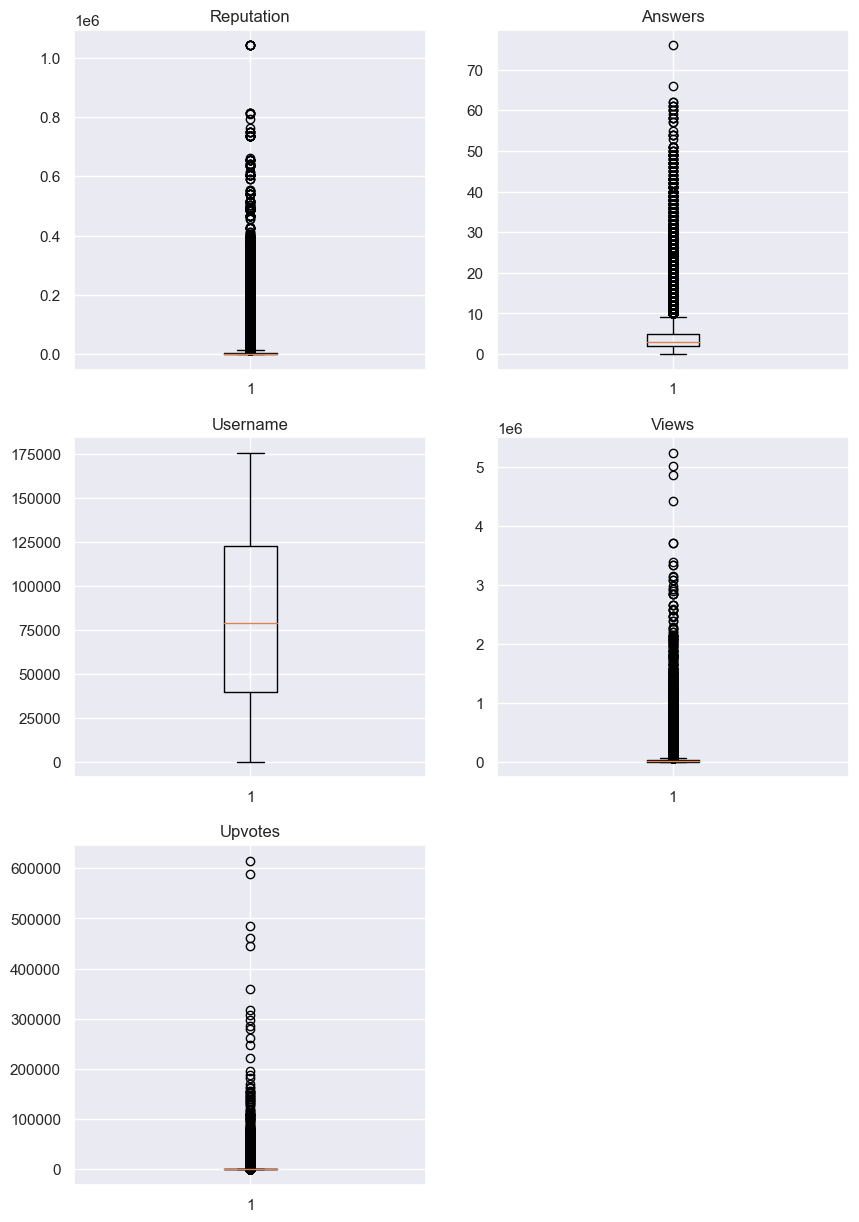

In [21]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(up[column])
plt.show()

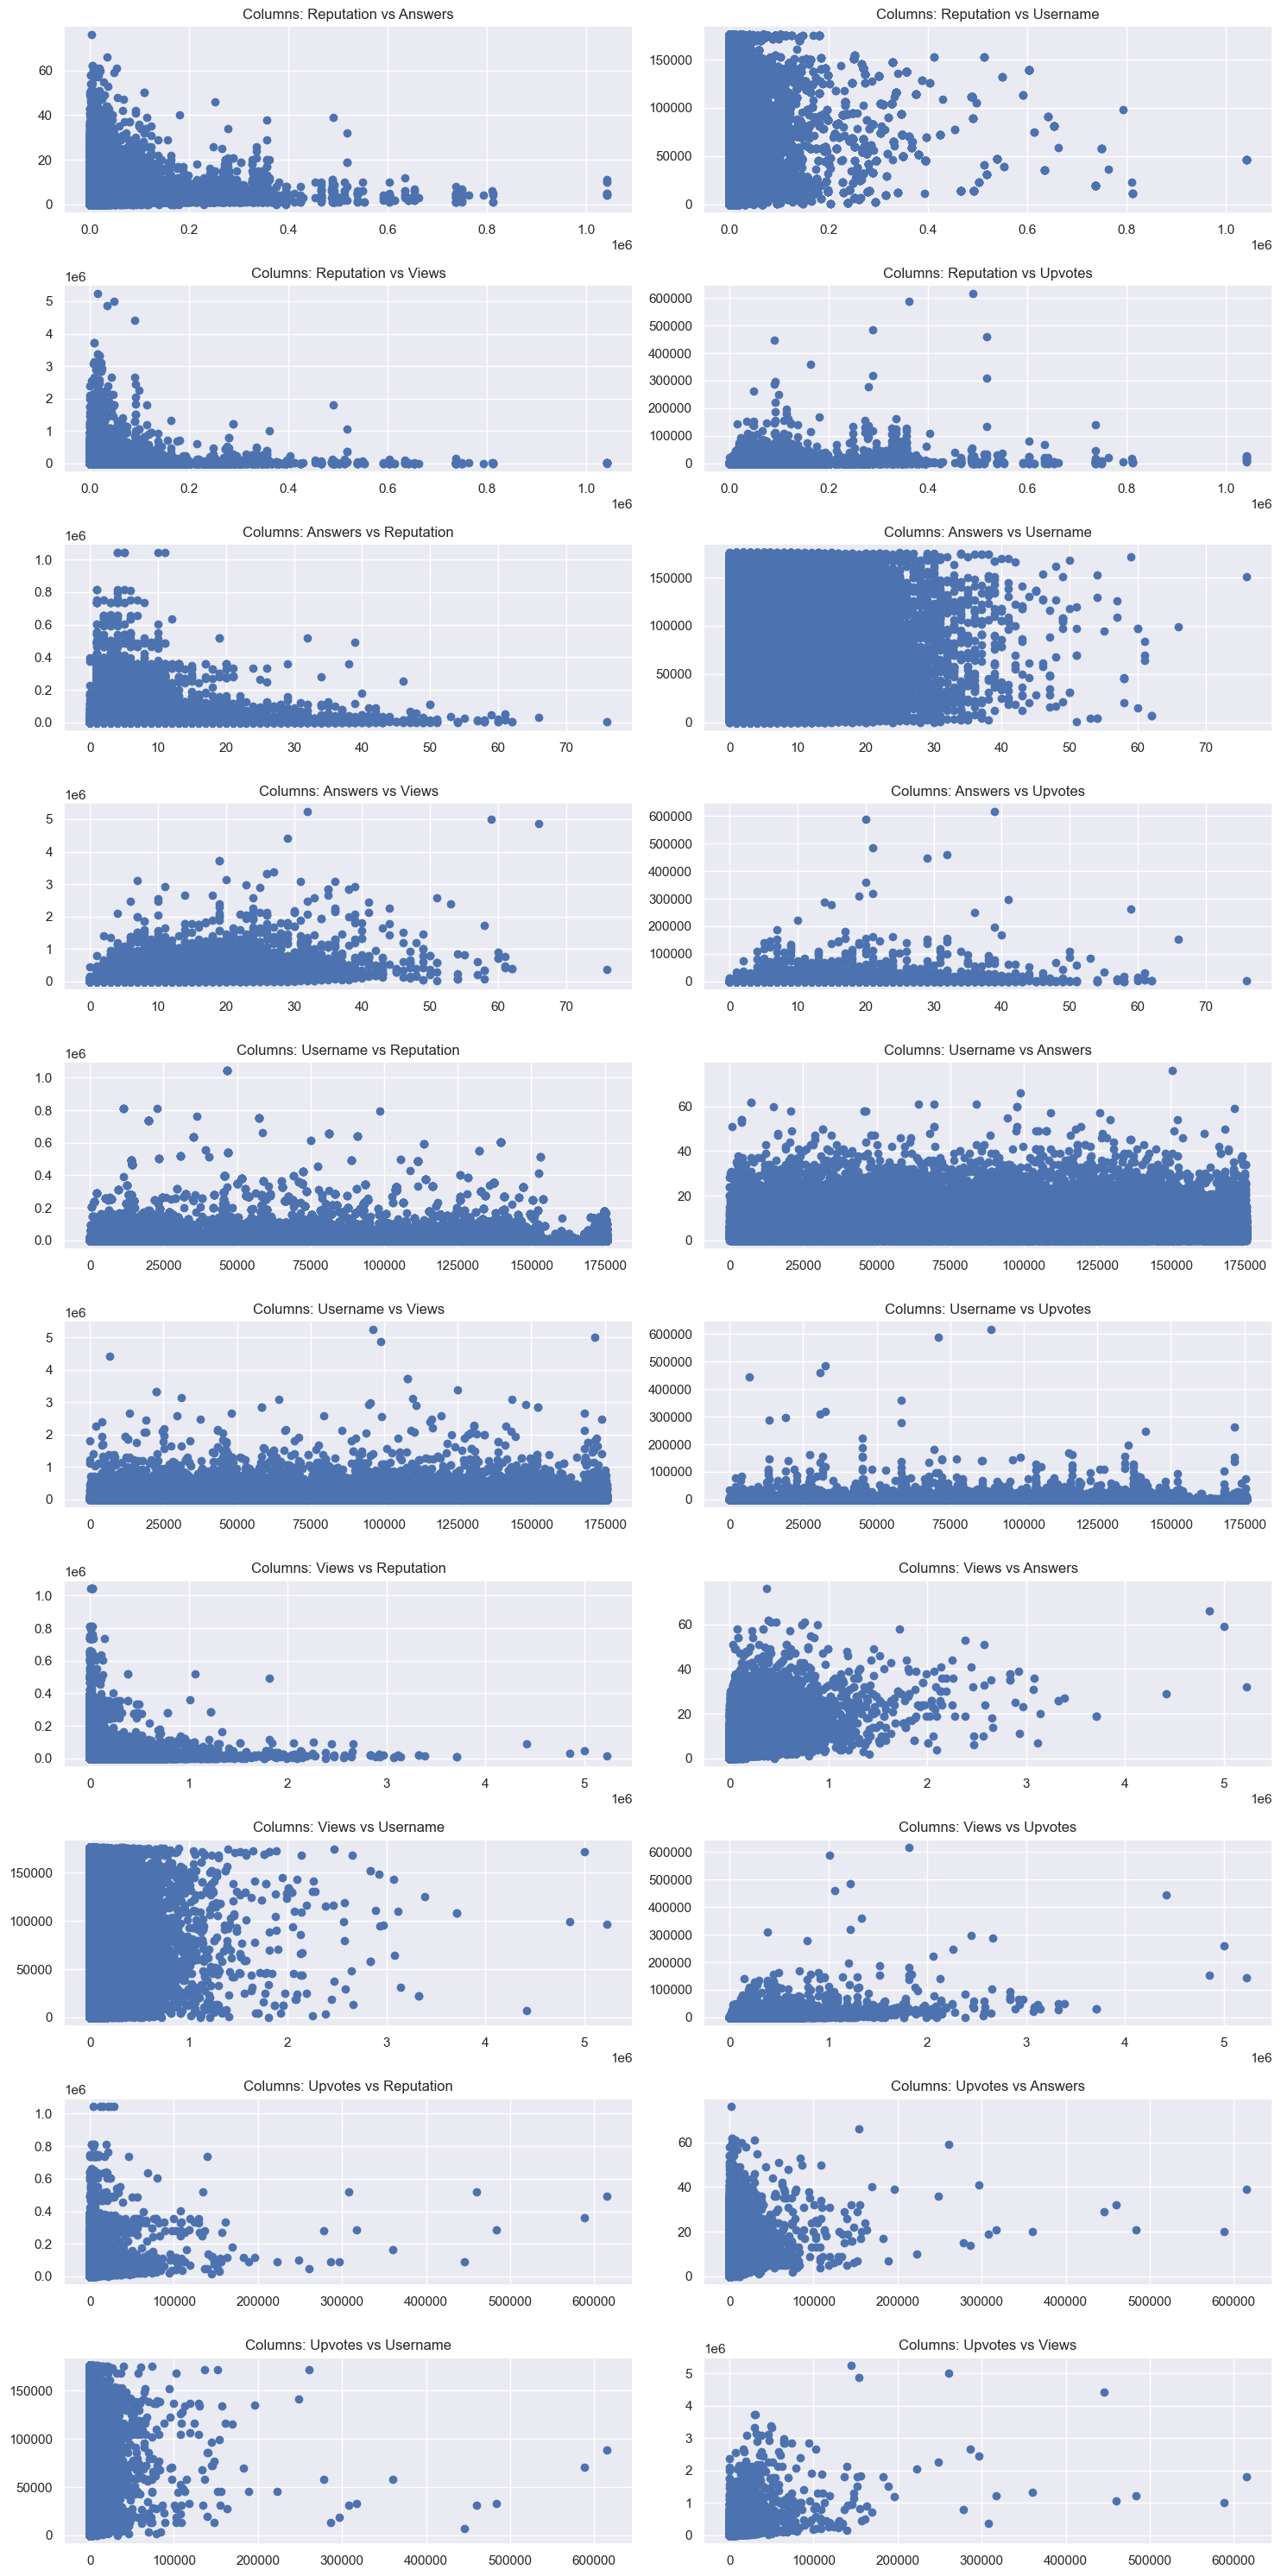

In [22]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(up[i], up[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [23]:
corr=up.corr(numeric_only=True)
corr

,Reputation,Answers,Username,Views,Upvotes
Reputation,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.266710,0.202033,-0.011970,0.437336,1.000000


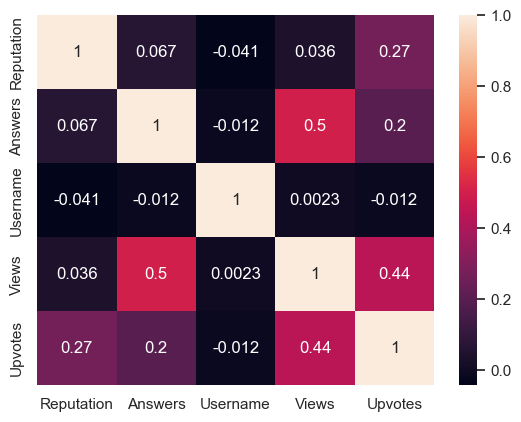

In [24]:
sns.heatmap(corr,annot=True)
plt.show()

In [25]:
num

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

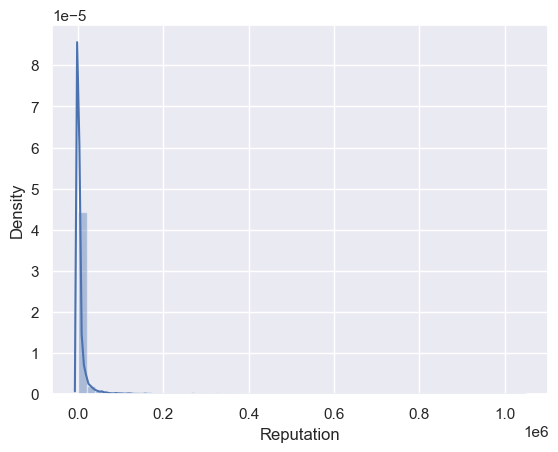

In [26]:
sns.distplot(up['Reputation'])
plt.show()

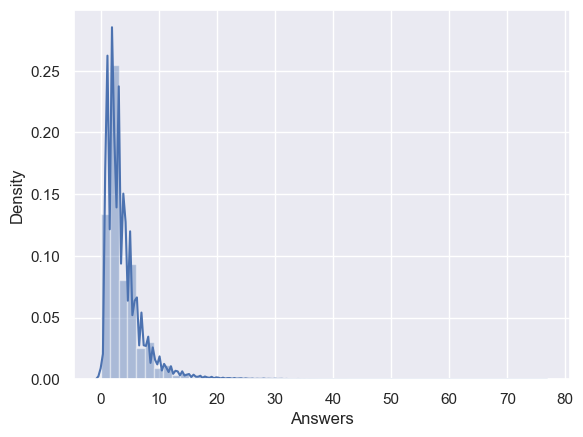

In [27]:
sns.distplot(up['Answers'])
plt.show()

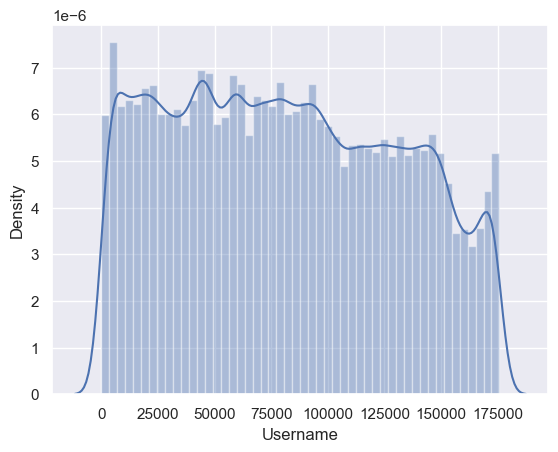

In [28]:
sns.distplot(up['Username'])
plt.show()

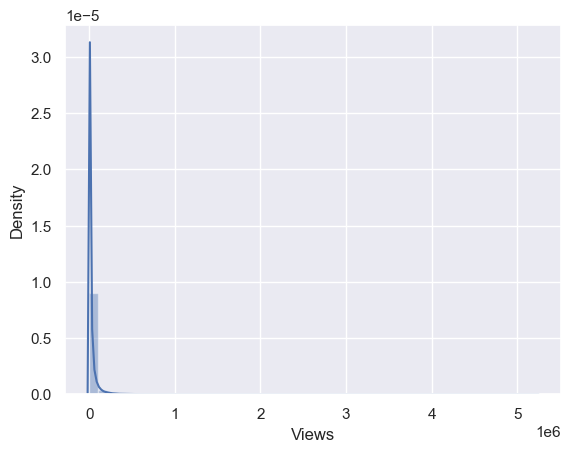

In [29]:
sns.distplot(up['Views'])
plt.show()

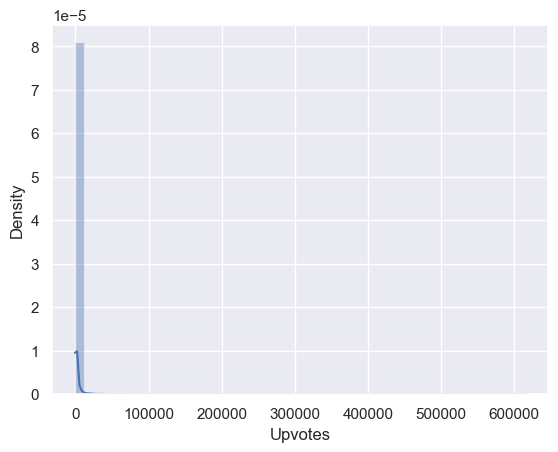

In [30]:
sns.distplot(up['Upvotes'])
plt.show()

In [31]:
up

,Reputation,Answers,Username,Views,Upvotes
0,3942.0,2.0,155623,7855.0,42.0
1,26046.0,12.0,21781,55801.0,1175.0
2,1358.0,4.0,56177,8067.0,60.0
3,264.0,3.0,168793,27064.0,9.0
4,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...
330040,36.0,2.0,84919,1063.0,0.0
330041,1649.0,2.0,76730,23319.0,73.0
330042,6178.0,2.0,91701,2453.0,15.0
330043,89.0,2.0,80245,2107.0,3.0


In [32]:
X=up.drop('Upvotes',axis=1)
y=up['Upvotes']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [35]:
print(up.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(330045, 5)
(264036, 4)
(66009, 4)
(264036,)
(66009,)


# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=lr.predict(X_test)

In [38]:
y_pred

array([-113.18484603, -248.02351077,  344.38196932, ..., -142.42347542,
       -345.15436774, -271.43915823])

In [39]:
y_test[:6].values,y_pred[:6]

(array([1.6000e+01, 2.2000e+01, 1.6900e+02, 8.0000e+01, 4.8000e+01,
        1.8208e+04]),
 array([-113.18484603, -248.02351077,  344.38196932, -146.81560903,
        -546.27910808, 4916.15216614]))

In [40]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [41]:
mean_absolute_error1=mean_absolute_error(y_test,y_pred)
mean_square_error1=mean_squared_error(y_test,y_pred)
R2_score1=r2_score(y_test,y_pred)

In [42]:
print('mean_absolute_error1',mean_absolute_error1)
print('mean_square_error1',mean_square_error1)
print('R2_score1',R2_score1)

mean_absolute_error1 597.6238296586974
mean_square_error1 12347932.832495
R2_score1 0.18800586301061606


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
y_pred_dt=dtree.predict(X_test)

In [45]:
y_pred_dt

array([ 29.,  30., 208., ...,  78.,  31.,   0.])

In [46]:
mean_absolute_error2=mean_absolute_error(y_test,y_pred_dt)
mean_square_error2=mean_squared_error(y_test,y_pred_dt)
R2_score2=r2_score(y_test,y_pred_dt)

In [47]:
print('mean_absolute_error2',mean_absolute_error2)
print('mean_square_error2',mean_square_error2)
print('R2_score2',R2_score2)

mean_absolute_error2 144.28670585324224
mean_square_error2 5899650.639280248
R2_score2 0.6120418053478125


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
y_pred_RF=RF.predict(X_test)

In [50]:
y_pred_RF

array([45.16666667, 14.8       , 94.66333333, ..., 47.31      ,
       19.23      , 22.711     ])

In [51]:
mean_absolute_error3=mean_absolute_error(y_test,y_pred_RF)
mean_square_error3=mean_squared_error(y_test,y_pred_RF)
R2_score3=r2_score(y_test,y_pred_RF)

In [52]:
print('mean_absolute_error3',mean_absolute_error3)
print('mean_square_error3',mean_square_error3)
print('R2_score3',R2_score3)

mean_absolute_error3 110.4487213974134
mean_square_error3 3226477.6399325132
R2_score3 0.7878283788637052


# KNN

In [53]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [54]:
y_pred_KN=KNN.predict(X_test)

In [55]:
y_pred_KN

array([42. , 12.8, 94.8, ..., 27.2, 16.8, 15. ])

In [56]:
mean_absolute_error4=mean_absolute_error(y_test,y_pred_KN)
mean_square_error4=mean_squared_error(y_test,y_pred_KN)
R2_score4=r2_score(y_test,y_pred_KN)

In [57]:
print('mean_absolute_error4',mean_absolute_error4)
print('mean_square_error4',mean_square_error4)
print('R2_score4',R2_score4)

mean_absolute_error4 128.78505052341347
mean_square_error4 3887483.3303398015
R2_score4 0.7443609618953471


In [58]:
dic1={'Mean absolute Error':[mean_absolute_error1,mean_absolute_error2,mean_absolute_error3,mean_absolute_error4],
     'Mean Square Error':[mean_square_error1,mean_square_error2,mean_square_error3,mean_square_error4],
     'R2 Score':[R2_score1,R2_score2,R2_score3,R2_score4]}
pd.DataFrame(dic1,index=['Linear Regression','Decision Tree','Random Forest','KNN'])

,Mean absolute Error,Mean Square Error,R2 Score
Linear Regression,597.623830,1.234793e+07,0.188006
Decision Tree,144.286706,5.899651e+06,0.612042
Random Forest,110.448721,3.226478e+06,0.787828
KNN,128.785051,3.887483e+06,0.744361


In [72]:
up

,Reputation,Answers,Username,Views,Upvotes
0,3942.0,2.0,155623,7855.0,42.0
1,26046.0,12.0,21781,55801.0,1175.0
2,1358.0,4.0,56177,8067.0,60.0
3,264.0,3.0,168793,27064.0,9.0
4,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...
330040,36.0,2.0,84919,1063.0,0.0
330041,1649.0,2.0,76730,23319.0,73.0
330042,6178.0,2.0,91701,2453.0,15.0
330043,89.0,2.0,80245,2107.0,3.0


In [73]:
X=up.drop('Upvotes',axis=1)

y=up['Upvotes']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [75]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(264036, 4)
(66009, 4)
(264036,)
(66009,)


In [76]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [77]:
gt=DecisionTreeRegressor()
gt

DecisionTreeRegressor()

In [78]:
gt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [79]:
param_gt={
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0,42]
}

In [80]:
import time
start=time.time()
gt_search=GridSearchCV(gt,param_gt,
                      scoring='accuracy',
                      cv=5,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [81]:
gt_search

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [84]:
start=time.time()
gt_search.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


ValueError: 
All the 1440 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'friedman_mse', 'absolute_error', 'squared_error', 'poisson'}. Got 'gini' instead.

--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'friedman_mse', 'absolute_error', 'squared_error', 'poisson'}. Got 'entropy' instead.


In [ ]:
gt_search.be